In [2]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [68]:
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

In [49]:
def Nbody_snaps(snap, Nhost):
    path = '../../LMC-MW/data/LMCMW/MWmLMC6/H1/'
    positions = readsnap(path + snap,'pos', 'dm')
    velocities = readsnap(path + snap,'vel', 'dm')
    particles_ids = readsnap(path + snap, 'pid', 'dm')
    ID = np.sort(particles_ids)
    # The first set of particles are from the host DM halo, the
    # second set are from the satellite DM halo, the limit is know by
    # the number of particles in the host halo.
    idcut = ID[Nhost-1]
    index_mw = np.where(particles_ids<=idcut)[0]
    index_LMC = np.where(particles_ids>idcut)[0]
    x_mw = positions[index_mw,0]
    y_mw = positions[index_mw,1]
    z_mw = positions[index_mw,2]
    x_lmc = positions[index_LMC,0]
    y_lmc = positions[index_LMC,1]
    z_lmc = positions[index_LMC,2]
    vx_lmc = velocities[index_LMC,0]
    vy_lmc = velocities[index_LMC,1]
    vz_lmc = velocities[index_LMC,2]
    
    # cuts 
    index1 = np.where(np.sqrt(x_mw**2+y_mw**2+z_mw**2)<500)[0]
    index2 = np.where(np.sqrt(x_lmc**2+y_lmc**2+z_lmc**2)<500)[0]
    index3 = np.where(np.sqrt(positions[:, 0]**2.0+positions[:, 1]**2.0+positions[:, 2]**2.0)<400)[0]
    return x_lmc, y_lmc, z_lmc, vx_lmc, vy_lmc, vz_lmc




In [50]:
xlmc, ylmc, zlmc, vxlmc, vylmc, vzlmc = Nbody_snaps('MWfLMC6H1_119.hdf5', 1000000)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [16]:
r_sun = [-8.299, 0.0, 0.027]
v_sun = [0.0, 220.0, 0.0] # Kuhlen e.a 2012 page 8

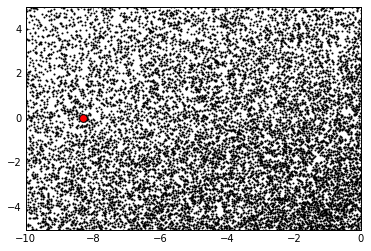

In [39]:
scatter(xlmc, ylmc, s=1.0)
xlim(-10, 0)
ylim(-5, 5)
scatter(r_sun[0], r_sun[1], s=60, c='r')

In [51]:
def solar_n_wedge(x, y, z, vx, vy, vz):
    index = np.where((x>-9.5) & (x<-7.5) & (z<2.5) & (z>-2.5) & (y<1.5) & (y>-1.5))[0]
    return x[index], y[index], z[index], vx[index], vy[index], vz[index]
    
    

In [54]:
x_sn, y_sn, z_sn, vx_sn, vy_sn, vz_sn = solar_n_wedge(xlmc, ylmc, zlmc, vxlmc, vylmc, vzlmc)

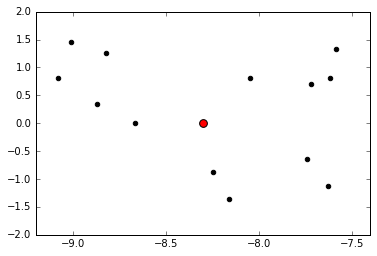

In [55]:
scatter(x_sn, y_sn, c='k')
scatter(r_sun[0], r_sun[1], s=60, c='r')

In [56]:
def speed_distribution(Vx, Vy, Vz):
    return np.sqrt(Vx**2.0 + Vy**2.0 + Vz**2.0)

In [58]:
s_d = speed_distribution(vx_sn, vy_sn, vz_sn)

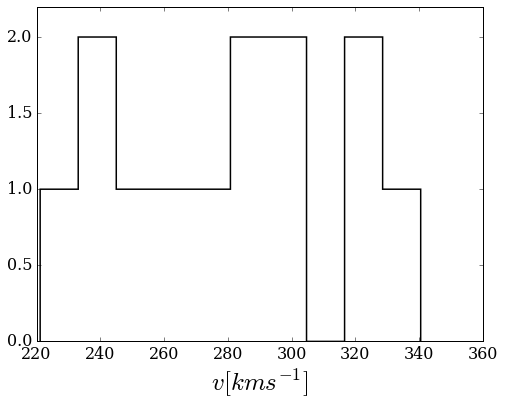

In [69]:
figure(figsize=(8, 6))
h1 = hist(s_d, histtype='step', color='k', lw=1.5)
ylim(0, 2.2)
xlabel('$v[km s^{-1}]$', fontsize=25)

In [71]:
v_LSR = np.array([0.0, 220.0, 0.0])
v_pec = np.array([10, 5.23, 7.17])
v_earth1 = 29.8 * np.array([0.99, 0.11,-0.01])
v_earth2 = 29.8 * np.array([-0.06, 0.49,-0.86])

In [72]:
earth_velocity = v_LSR + v_pec + v_earth1

In [73]:
earth_velocity

array([  39.502,  228.508,    6.872])

In [78]:
def speed_distribution_earth(Vx, Vy, Vz, ev):
    Vx = Vx - ev[0]
    Vy = Vy - ev[1]
    Vz = Vz - ev[2]
    return np.sqrt(Vx**2.0 + Vy**2.0 + Vz**2.0)

In [79]:
s_de = speed_distribution_earth(vx_sn, vy_sn, vz_sn, earth_velocity)

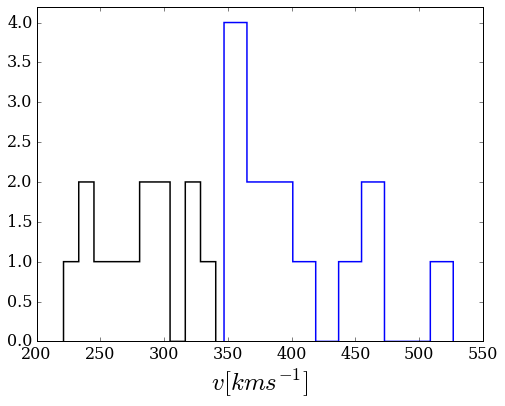

In [82]:
figure(figsize=(8, 6))
h1 = hist(s_d, histtype='step', color='k', lw=1.5)
h2 = hist(s_de, histtype='step', color='b', lw=1.5)
ylim(0, 4.2)
xlabel('$v[km s^{-1}]$', fontsize=25)